In [29]:
using Distributions
using Plots
using Base
using Random

MersenneTwister(UInt32[0x000004d2], Random.DSFMT.DSFMT_state(Int32[-1393240018, 1073611148, 45497681, 1072875908, 436273599, 1073674613, -2043716458, 1073445557, -254908435, 1072827086  …  -599655111, 1073144102, 367655457, 1072985259, -1278750689, 1018350124, -597141475, 249849711, 382, 0]), [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], UInt128[0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000  …  0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x000000000000

In [43]:
Random.seed!(1234)
d = Normal()
u = Uniform(0,1)
y = rand(u,1)

1-element Array{Float64,1}:
 0.5908446386657102

In [220]:
#The MCM algorithm for 
num_sim = 10000
x0 = 0.5
x = zeros(num_sim)
#set initial value
x[1] = x0
#choose distribution
@. p(x) = ( exp(-(x-2)^2/2) + exp(-(x+2)^2/2) ) / ( 2*sqrt(pi*2))
#apply MCM algorithm
for i in 1:(num_sim-1)
    xc = rand(Normal(x[i], 1), 1)
    r = rand(Uniform(0,1),1)
    log_r = log(r[1])
    log_ratio = log(p(xc[1])) - log(p(x[i]))
    log_r < log_ratio ? x[i+1]=xc[1] : x[i+1] = x[i]
end
    
    
    

Normal{Float64}(μ=0.12408448973263678, σ=2.235199873968086)


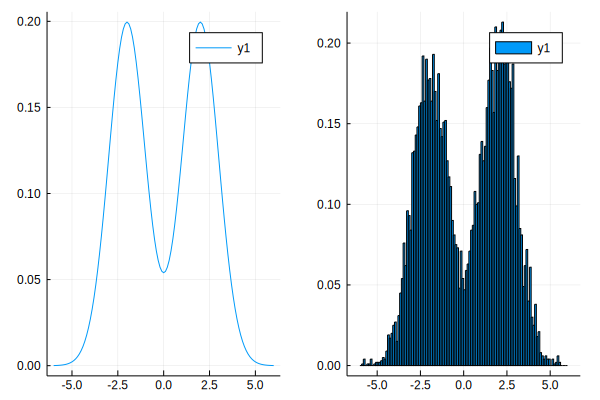

In [221]:
numbins = 10
bins = collect(-6:0.1:6)
burnin = 1
println(fit_mle(Normal, x))

p1=plot(bins,p(bins));
p2=histogram(x[burnin:end],bins=bins,normalize=true);
plot(p1,p2)


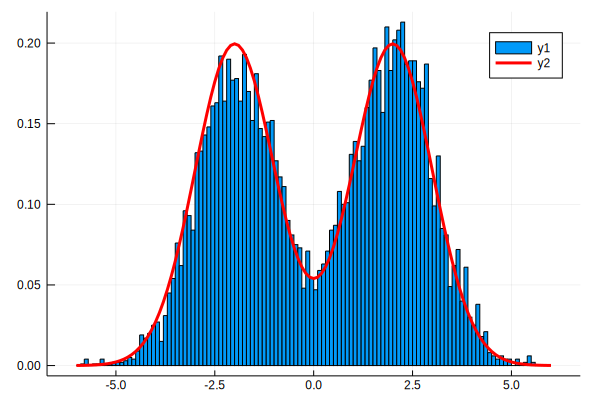

In [222]:
histogram(x[burnin:end],bins=bins,normalize=true)
p3=plot!(bins,p(bins),lw=3,color="red");
plot(p3)